In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#imbalaced or not
target_counts = data['RainTomorrow'].value_counts()

class_0_count = target_counts[0]
class_1_count = target_counts[1]

class_ratio = class_1_count / class_0_count

if class_ratio < 0.5 or class_ratio > 2:
    print("The data is imbalanced.")
else:
    print("The data is balanced.")


The data is imbalanced.


In [7]:
for each_feature in data.columns[data.dtypes == np.object]:
    unique_values = len(data[each_feature].unique())
    print("Cardinality (number of unique values) of {} is: {}".format(each_feature, unique_values))

Cardinality (number of unique values) of Date is: 3436
Cardinality (number of unique values) of Location is: 49
Cardinality (number of unique values) of WindGustDir is: 17
Cardinality (number of unique values) of WindDir9am is: 17
Cardinality (number of unique values) of WindDir3pm is: 17
Cardinality (number of unique values) of RainToday is: 3
Cardinality (number of unique values) of RainTomorrow is: 3


In [8]:
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].apply(lambda x:x.year)
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)


In [9]:
data[['Year','Month','Day']]
data.drop('Date', axis=1, inplace = True)

In [10]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [11]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


In [12]:
data.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [13]:
missing=pd.DataFrame(data.isna().sum(),columns=['No of missing values'])
missing['% missing_values']= (missing/len(data)).round(2)*100
missing

,No of missing values,% missing_values
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0


In [14]:
data=data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Rainfall'],axis=1)

In [15]:
num_col = data.select_dtypes(include=np.number,exclude=np.int64).columns.to_list()

In [16]:
cat_col = data.select_dtypes(include=object).columns.to_list()


In [17]:
#missing_value_

In [18]:
data.dropna(how='all',subset=['RainTomorrow'],inplace=True)

In [19]:
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

In [20]:
data_yes.drop(['Year', 'Month', 'Day','RainToday'], axis=1).mode()


,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,Portland,9.6,17.2,W,39.0,N,W,9.0,17.0,99.0,69.0,1014.0,1010.4,13.8,16.0,Yes


In [21]:
data_no.drop(['Year', 'Month', 'Day','RainToday'], axis=1).mode()


,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,Canberra,11.0,20.0,E,35.0,N,SE,9.0,13.0,65.0,52.0,1017.9,1015.5,16.0,20.0,No


In [22]:
for i in num_col:
    data_yes[i].fillna(data_yes[i].median(), inplace=True)
    
for j in cat_col:
    data_yes[j].fillna(data_yes[j].mode()[0], inplace=True)
    
for i in num_col:
    data_no[i].fillna(data_no[i].median(), inplace=True)
    
for j in cat_col:
    data_no[j].fillna(data_no[j].mode()[0], inplace=True)


In [23]:
data = pd.concat([data_yes, data_no], ignore_index=True, verify_integrity=True, sort=False)


In [24]:
data

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,9.7,31.9,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,1011.8,1008.7,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,1012.2,1010.4,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,20
142189,Uluru,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,21
142190,Uluru,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,22
142191,Uluru,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,23


In [25]:
#outlier

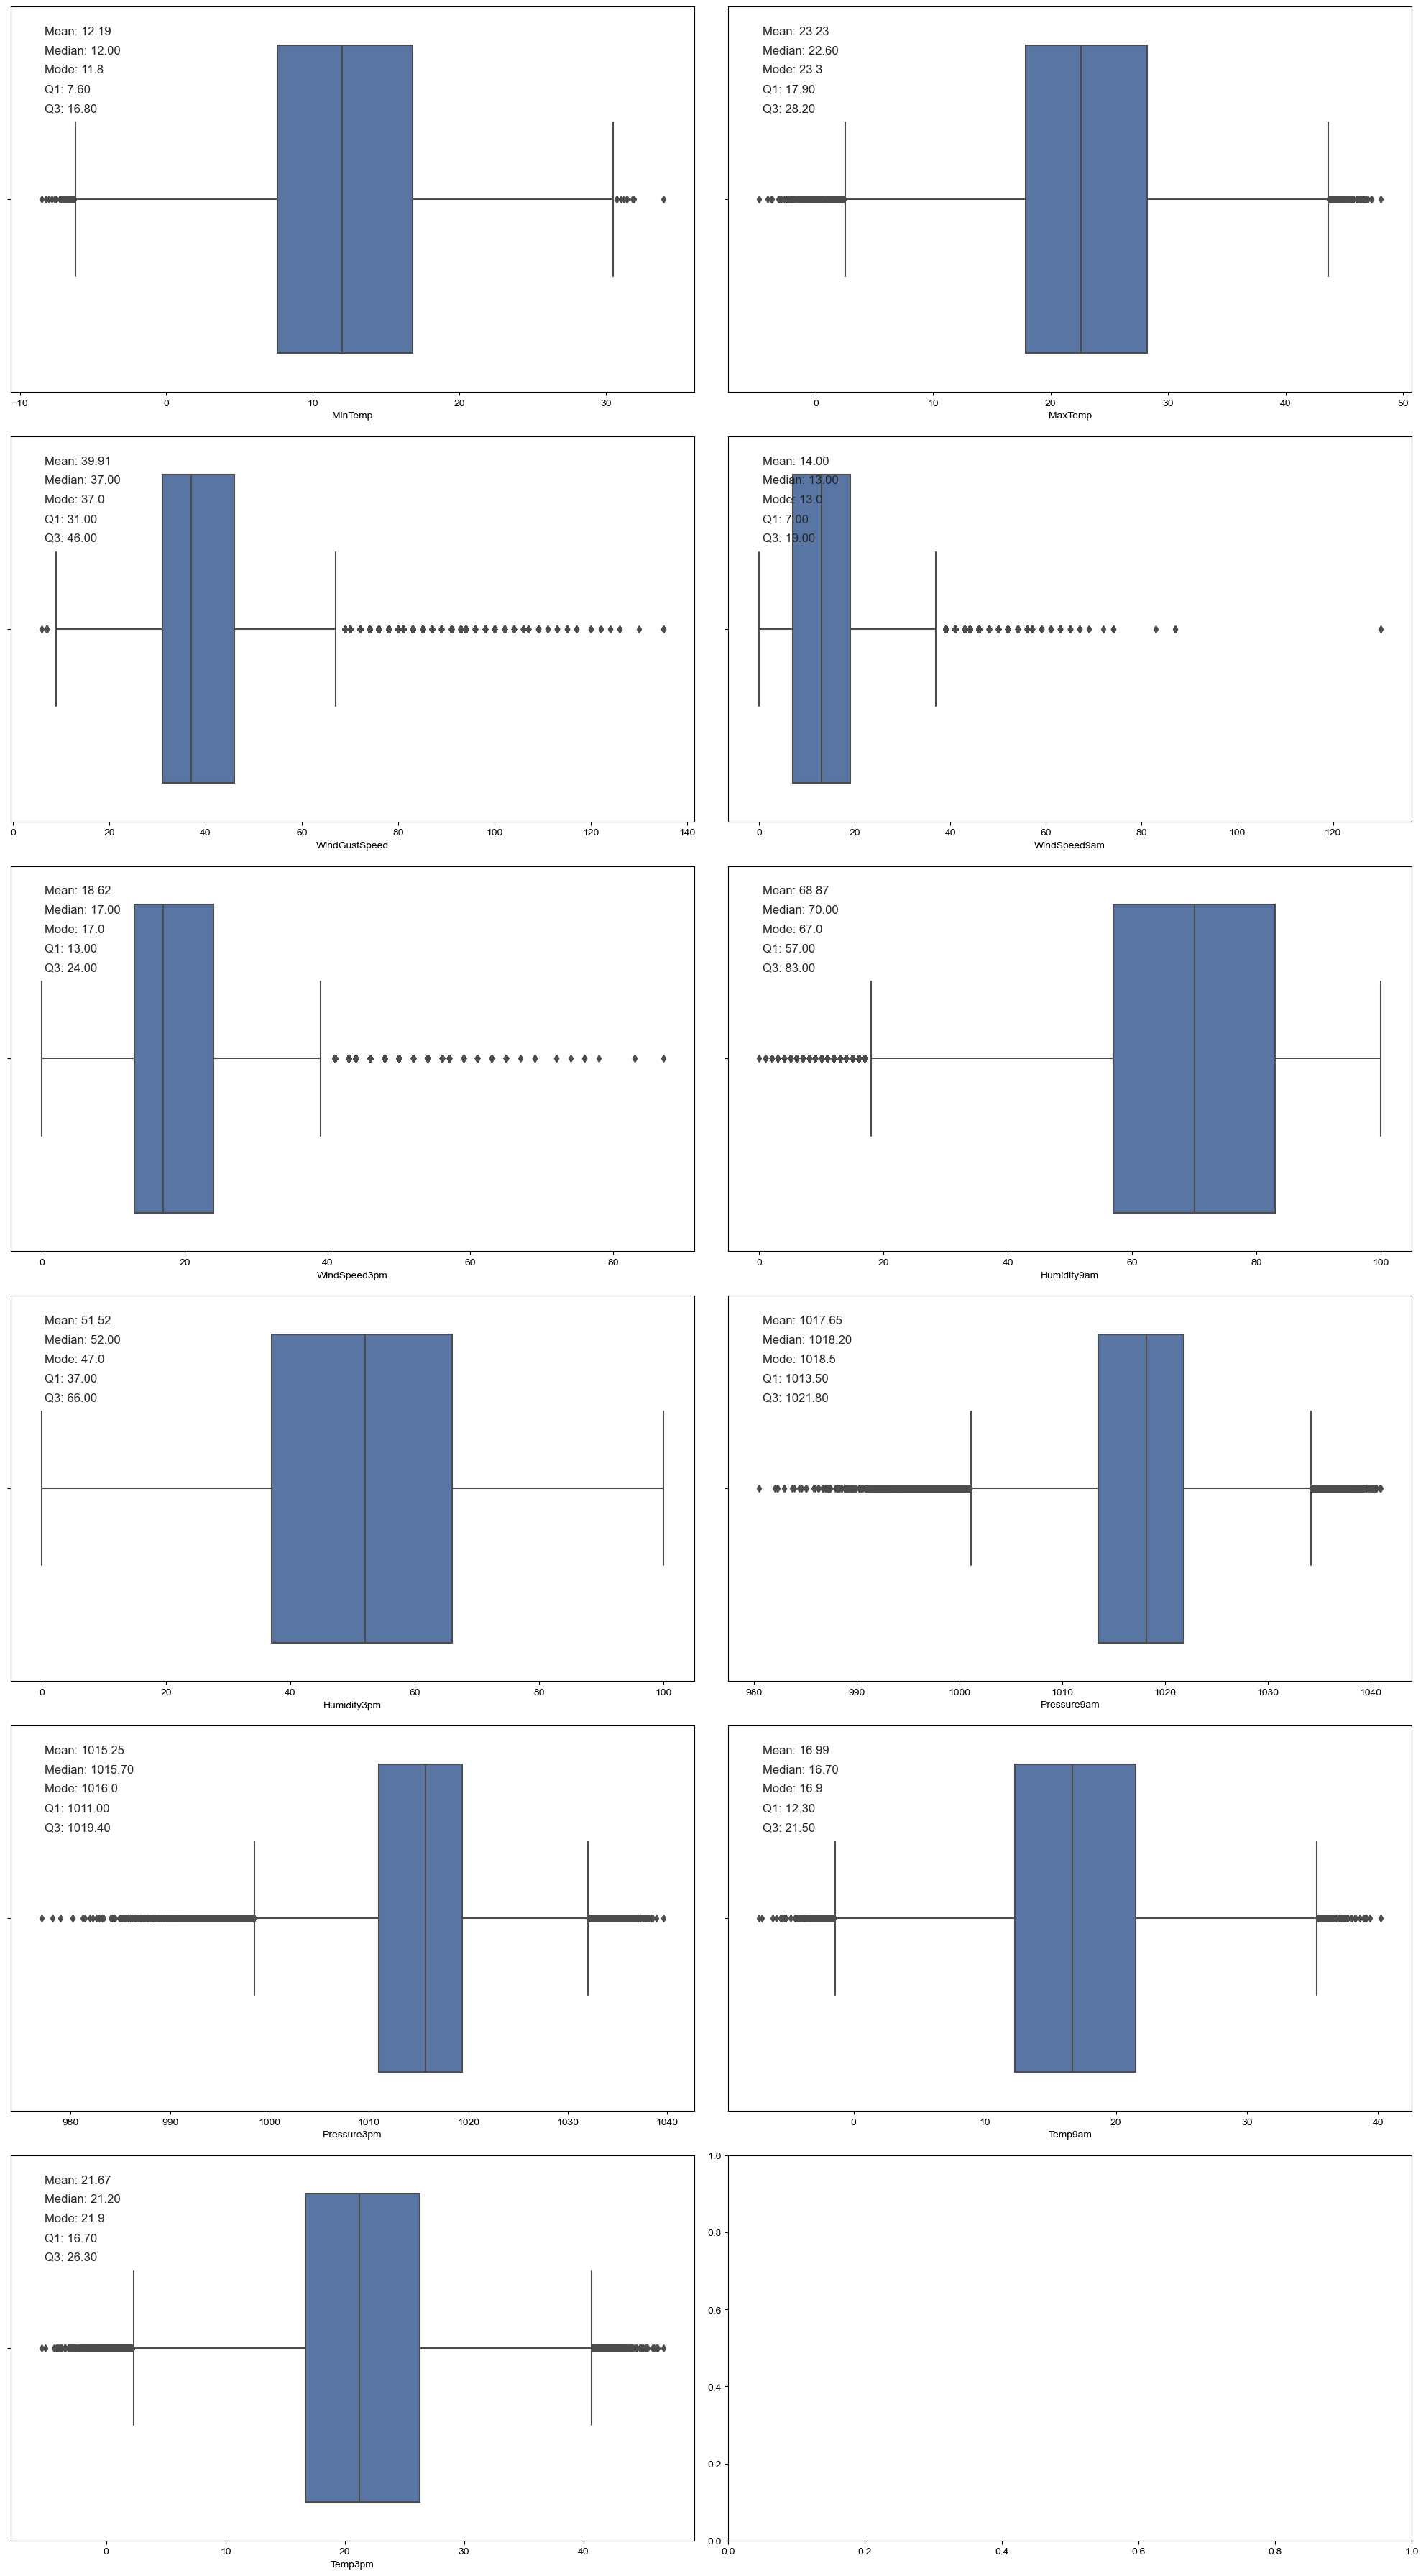

In [26]:
fig, axs = plt.subplots(6, 2, figsize=(20, 36))

for i, ax in zip(num_col, axs.flatten()):
    sns.set(style="darkgrid")
    sns.boxplot(x=i, data=data, ax=ax)
    ax.set_xlabel(i)
    
    
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode().values[0]
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    
    
    ax.text(0.05, 0.95, f"Mean: {mean:.2f}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.90, f"Median: {median:.2f}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.85, f"Mode: {mode}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.80, f"Q1: {q1:.2f}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.75, f"Q3: {q3:.2f}", transform=ax.transAxes, ha='left', va='top')

plt.tight_layout()
plt.show()


In [27]:
features_with_outliers = ['MinTemp', 'MaxTemp','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    data.loc[data[feature] < lower_limit, feature] = lower_limit
    data.loc[data[feature] > upper_limit, feature] = upper_limit


In [28]:
#imbalaced or not
target_counts = data['RainTomorrow'].value_counts()

class_0_count = target_counts[0]
class_1_count = target_counts[1]

class_ratio = class_1_count / class_0_count

if class_ratio < 0.5 or class_ratio > 2:
    print("The data is imbalanced.")
else:
    print("The data is balanced.")


The data is imbalanced.


# EDA

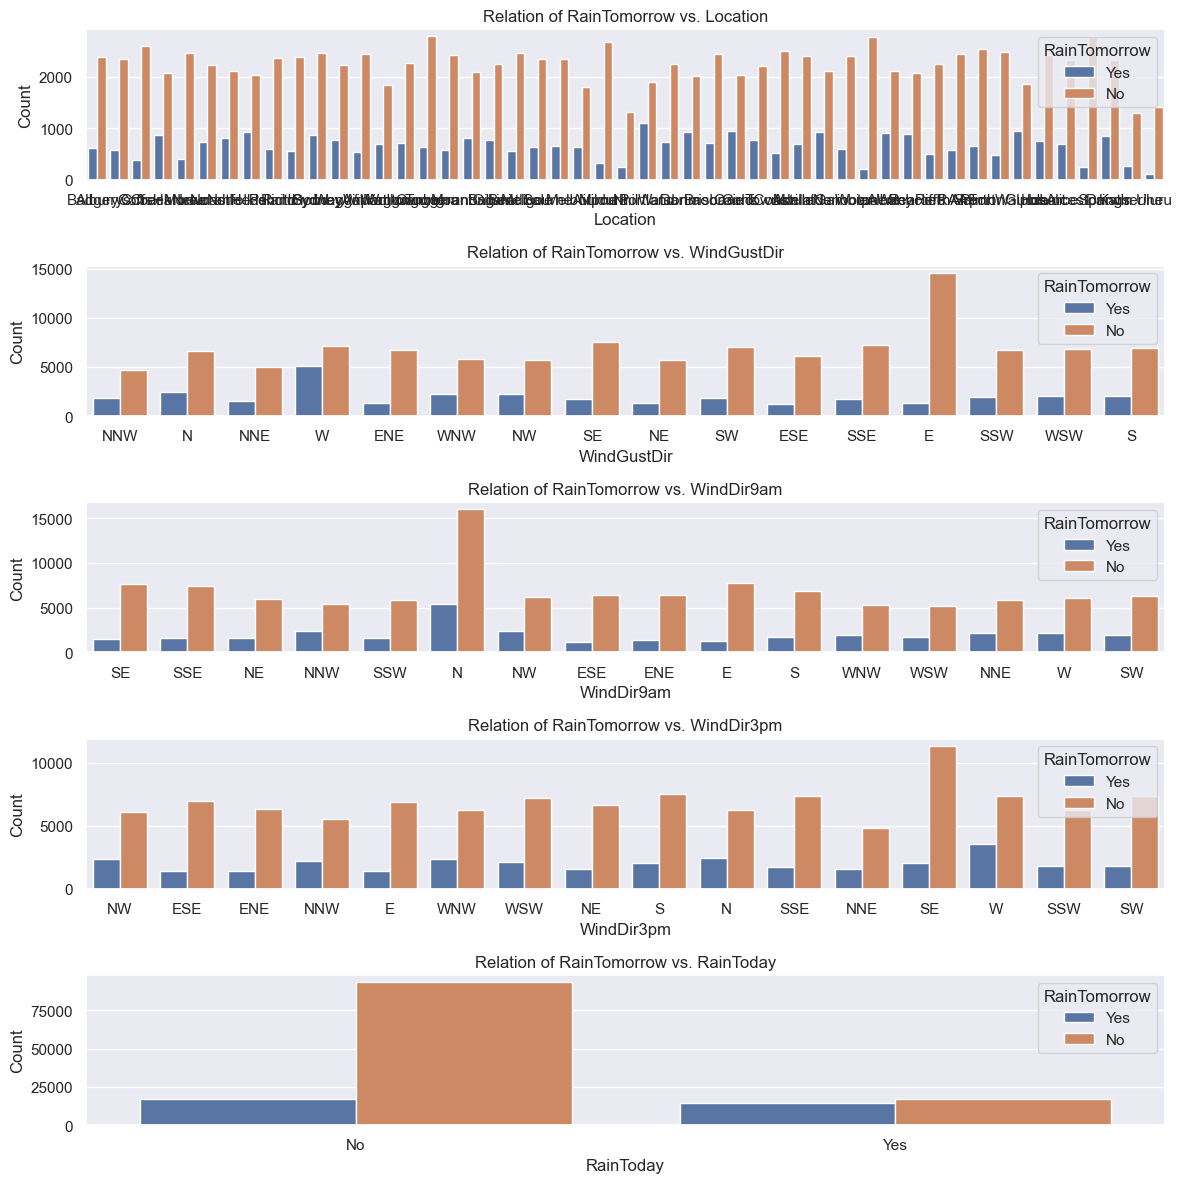

In [29]:
category = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_plots = len(category)
fig, axs = plt.subplots(num_plots, 1, figsize=(12, 12))


for index, column in enumerate(category):
    sns.countplot(data=data, x=column, hue='RainTomorrow', ax=axs[index])
    axs[index].set_xlabel(column)
    axs[index].set_ylabel('Count')
    axs[index].set_title(f'Relation of RainTomorrow vs. {column}')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

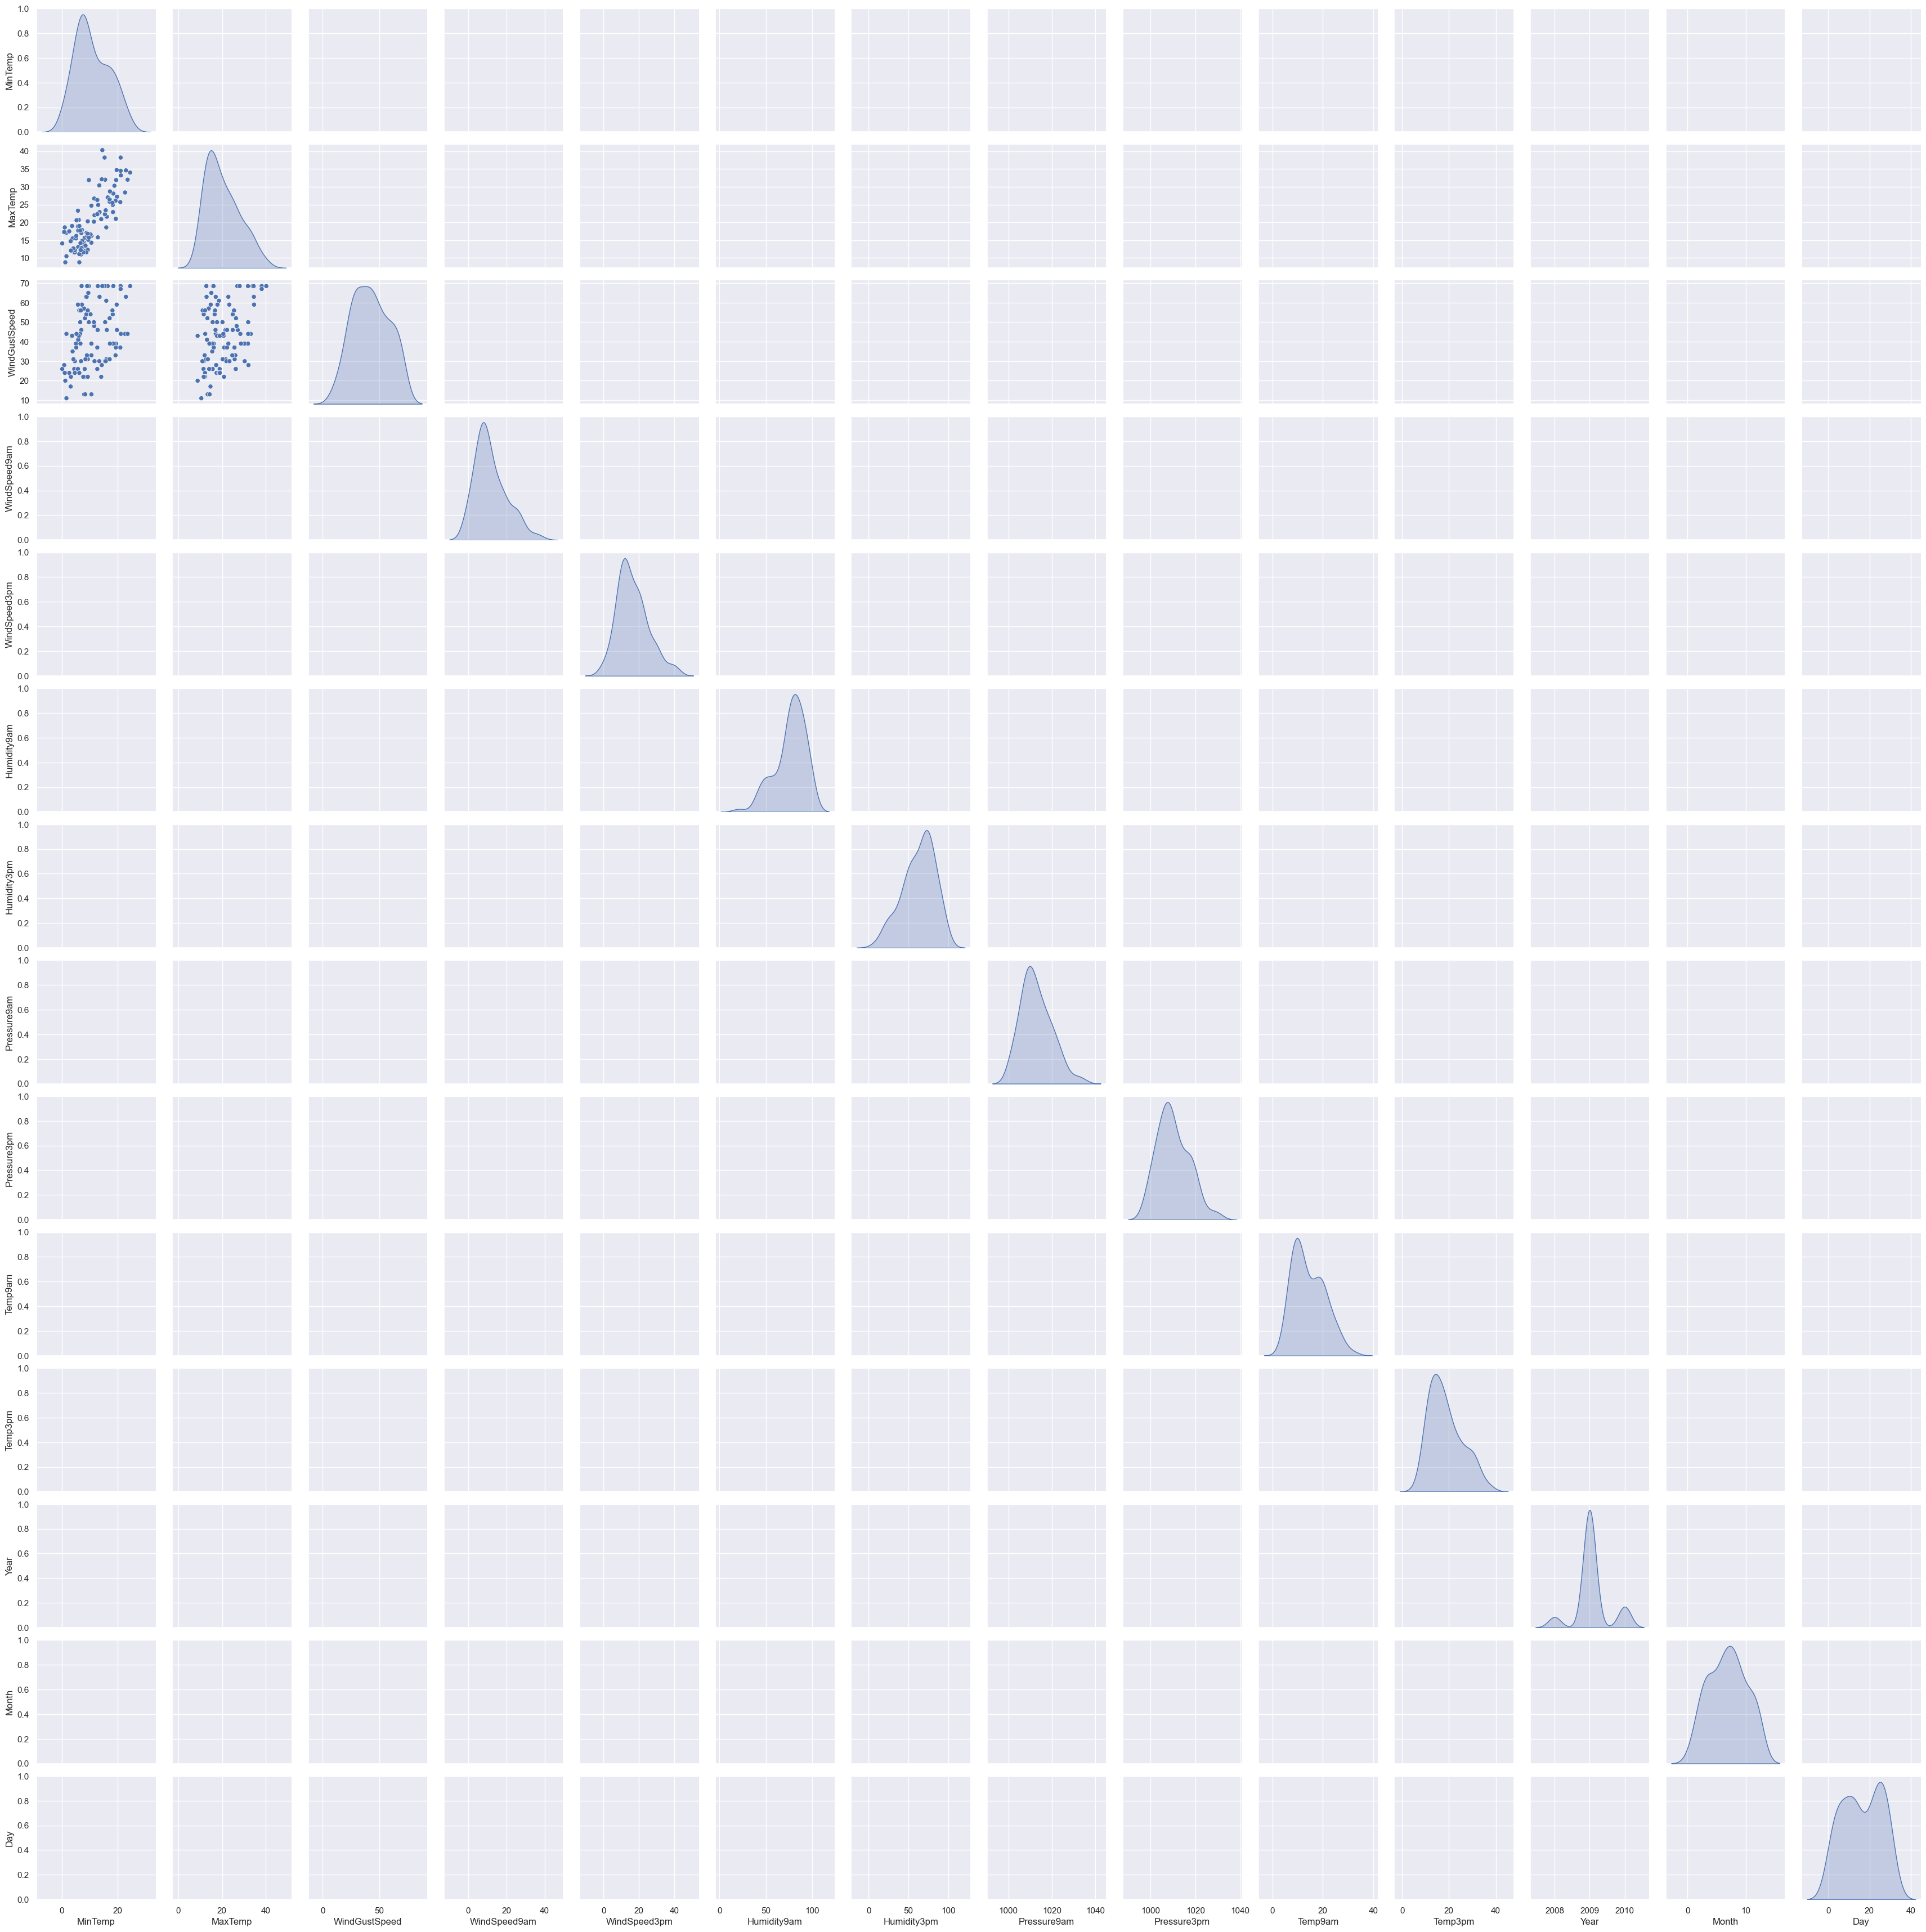

In [30]:
sns.pairplot(data[:100], hue='RainTomorrow')

In [ ]:
for i in num_col:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data[i], bins=20, kde=True, ax=axs[0])
    sns.boxplot(data[i], ax=axs[1], fliersize=1)

    # Calculate essential statistics
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode().values[0]
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    # Display statistics on the boxplot
    axs[1].text(0.05, 0.95, f"Mean: {mean:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.90, f"Median: {median:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.85, f"Mode: {mode}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.80, f"Q1: {q1:.2f}", transform=axs[1].transAxes, ha='left', va='top')
    axs[1].text(0.05, 0.75, f"Q3: {q3:.2f}", transform=axs[1].transAxes, ha='left', va='top')

plt.show()


In [ ]:
class_counts = data['RainTomorrow'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()


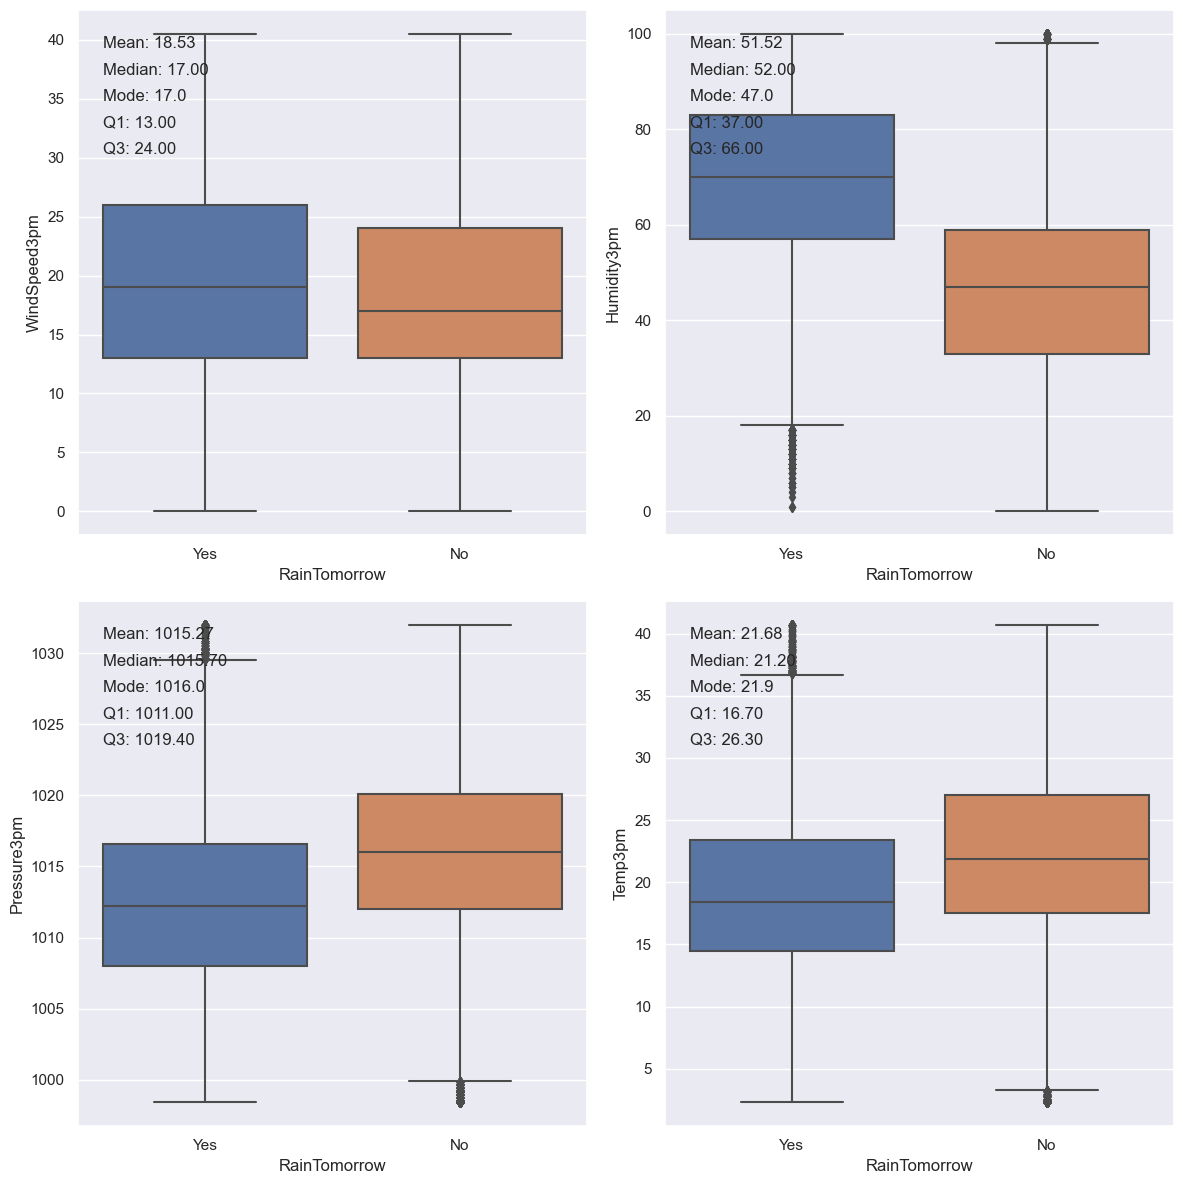

In [31]:
num_col = ['WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']
fig, axs = plt.subplots(2, 2, figsize=(12,12))

for i, ax in zip(num_col, axs.flatten()):
    sns.set(style="darkgrid")
    sns.boxplot(x='RainTomorrow', y=i, data=data, ax=ax)
    ax.set_xlabel('RainTomorrow')
    ax.set_ylabel(i)
    
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode().values[0]
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    
    ax.text(0.05, 0.95, f"Mean: {mean:.2f}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.90, f"Median: {median:.2f}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.85, f"Mode: {mode}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.80, f"Q1: {q1:.2f}", transform=ax.transAxes, ha='left', va='top')
    ax.text(0.05, 0.75, f"Q3: {q3:.2f}", transform=ax.transAxes, ha='left', va='top')

plt.tight_layout()
plt.show()


In [ ]:

numerical = ['WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Temp3pm']

num_plots = len(numerical)
num_rows = 2
num_cols = math.ceil(num_plots / num_rows)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for index, column in enumerate(numerical):
    row = index // num_cols
    col = index % num_cols
    sns.lineplot(data=data, x=data['Year'], y=column, hue='RainTomorrow',ax=axs[row, col])
    axs[row, col].set_xlabel('Year')
    axs[row, col].set_ylabel(column)
    axs[row, col].set_title(f'{column} over Time')

plt.tight_layout()
plt.show()


In [ ]:
data_yes_mode = data[data['RainTomorrow'] == 'Yes'].mode().squeeze()
data_no_mode = data[data['RainTomorrow'] == 'No'].mode().squeeze()
list2=['WindGustDir', 'WindDir3pm', 'RainToday']
list3=['WindGustSpeed','WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Temp3pm','Year','Month']

In [ ]:
for i in list2:
    mode_value1 = data[i].mode().values[0]
    print(f"Mode of {i}: {mode_value1}")
for j in list3:
    mode_value2 = data[j].mode().values[0]
    print(f"Mode of {j}: {mode_value2}")


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['RainToday']=le.fit_transform(data['RainToday'])
data['RainTomorrow']=le.fit_transform(data['RainTomorrow'])


In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
cat_columns=['WindGustDir','WindDir9am','WindDir3pm','Location']

In [34]:
data= pd.get_dummies(data, columns=cat_columns)

In [ ]:
#(data has non-normal distributions and contains outliers, using Robust Scaling  can be a suitable choice.
#\Robust Scaling works by centering the data around the median and scaling it based on the interquartile range 
#(IQR). It uses robust statistics instead of mean and standard deviation, which makes it more robust to outliers.)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [36]:
X = data.drop("RainTomorrow",axis=1)
y = data["RainTomorrow"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)


In [ ]:
#Logistic Regression 

In [40]:
model1 = LogisticRegression()
scores = cross_val_score(model1, X_train, y_train, cv=kfold)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print('Cross-validated scores:', scores)
print('Mean cross-validated score:', round(scores.mean(), 2))
print('Model accuracy score:', round(accuracy_score(y_test, y_pred1), 2))
print(classification_report(y_test, y_pred1))


Cross-validated scores: [0.8550761  0.8540212  0.85125835 0.85698498 0.85809012]
Mean cross-validated score: 0.86
Model accuracy score: 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33075
           1       0.75      0.55      0.63      9583

    accuracy                           0.86     42658
   macro avg       0.81      0.75      0.77     42658
weighted avg       0.85      0.86      0.85     42658



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)


[[31316  1759]
 [ 4352  5231]]


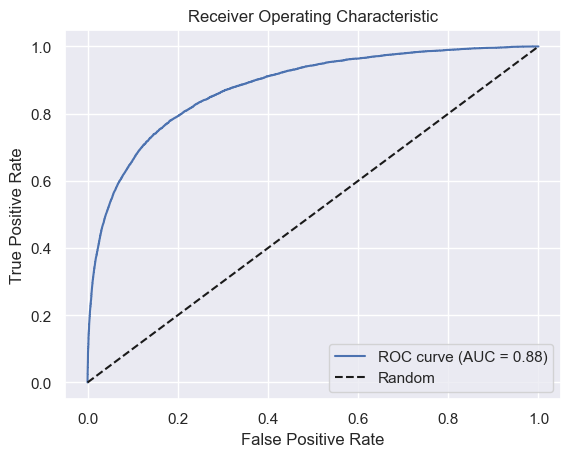

AUC: 0.88


In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
cv_results_rf = cross_val_score(model_rf, X_train, y_train, cv=kfold, scoring='accuracy')

print('Random Forest - Cross-validated scores:', cv_results_rf)
print('Random Forest - Mean cross-validated score:', round(cv_results_rf.mean(), 2))

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print('Random Forest - Model accuracy score:', round(accuracy_score(y_test, y_pred_rf), 2))
print('Random Forest - Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest - Cross-validated scores: [0.87295926 0.87326066 0.86934244 0.87712865 0.87833425]
Random Forest - Mean cross-validated score: 0.87
Random Forest - Model accuracy score: 0.88
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92     33075
           1       0.83      0.57      0.68      9583

    accuracy                           0.88     42658
   macro avg       0.86      0.77      0.80     42658
weighted avg       0.87      0.88      0.87     42658



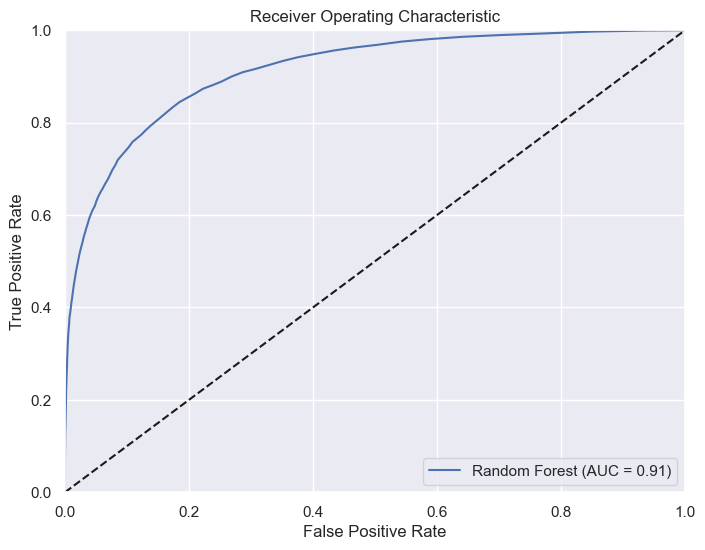

Random Forest - AUC score: 0.91


In [45]:
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print('Random Forest - AUC score:', round(auc_rf, 2))

In [ ]:
#SVC
from sklearn.svm import SVC

model3 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

cv_result1s= cross_val_score(model3, X_train, y_train, cv=kfold, scoring='accuracy')

print('\nSVM - Cross-validated scores:', cv_results1)
print('SVM - Mean cross-validated score:', round(cv_results1.mean(), 2))

model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print('SVM - Model accuracy score:', round(accuracy_score(y_test, y_pred3), 2))
print('SVM - Classification Report:')
print(classification_report(y_test, y_pred3))

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
kfold_gb = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results_gb = cross_val_score(model_gb, X_train, y_train, cv=kfold_gb, scoring='accuracy')

print('Gradient Boosting - Cross-validated scores:', cv_results_gb)
print('Gradient Boosting - Mean cross-validated score:', round(cv_results_gb.mean(), 2))

model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print('Gradient Boosting - Model accuracy score:', round(accuracy_score(y_test, y_pred_gb), 2))
print('Gradient Boosting - Classification Report:')
print(classification_report(y_test, y_pred_gb))

In [ ]:
# K-Nearest Neighbors
from sklearn.model_selection import KNeighborsClassifier
model_knn = KNeighborsClassifier()
kfold_knn = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results_knn = cross_val_score(model_knn, X_train, y_train, cv=kfold_knn, scoring='accuracy')

print('K-Nearest Neighbors - Cross-validated scores:', cv_results_knn)
print('K-Nearest Neighbors - Mean cross-validated score:', round(cv_results_knn.mean(), 2))

model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print('K-Nearest Neighbors - Model accuracy score:', round(accuracy_score(y_train, y_pred_knn), 2))
print('K-Nearest Neighbors - Classification Report:')
print(classification_report(y_test, y_pred_knn))

In [ ]:
# Naive Bayes
from sklearn.model_selection import GaussianNB
model_nb = GaussianNB()
kfold_nb = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results_nb = cross_val_score(model_nb, X_train, y_train, cv=kfold_nb, scoring='accuracy')

print('Naive Bayes - Cross-validated scores:', cv_results_nb)
print('Naive Bayes - Mean cross-validated score:', round(cv_results_nb.mean(), 2))

model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

print('Naive Bayes - Model accuracy score:', round(accuracy_score(y_train, y_pred_nb), 2))
print('Naive Bayes - Classification Report:')
print(classification_report(y_test, y_pred_nb))

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
model_ab = AdaBoostClassifier()
kfold_ab = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results_ab = cross_val_score(model_ab, X_train, y_train, cv=kfold_ab, scoring='accuracy')

print('AdaBoost - Cross-validated scores:', cv_results_ab)
print('AdaBoost - Mean cross-validated score:', round(cv_results_ab.mean(), 2))

model_ab.fit(X_train, y_train)
y_pred_ab = model_ab.predict(X_test)

print('AdaBoost - Model accuracy score:', round(accuracy_score(y_train, y_pred_ab), 2))
print('AdaBoost - Classification Report:')
print(classification_report(y_test, y_pred_ab))

In [ ]:
# XGBoost
from sklearn.ensemble import XGBClassifier
model_xgb = XGBClassifier()
kfold_xgb = KFold(n_splits=5, shuffle=True, random_state=0)
cv_results_xgb = cross_val_score(model_xgb, X_train, y_train, cv=kfold_xgb, scoring='accuracy')

print('XGBoost - Cross-validated scores:', cv_results_xgb)
print('XGBoost - Mean cross-validated score:', round(cv_results_xgb.mean(), 2))

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print('XGBoost - Model accuracy score:', round(accuracy_score(y_train, y_pred_xgb), 2))
print('XGBoost - Classification Report:')
print(classification_report(y_test, y_pred_xgb))

In [ ]:
model_names = ['LogisticRegression', 'RandomForestClassifier', 'SVC','GradientBoostingClassifier','KNeighborsClassifier','GaussianNB','AdaBoostClassifier','XGBClassifier']
accuracy_scores = [0.85, 0.92, 0.89]
precision_scores = [0.82, 0.88, 0.91]
recall_scores = [0.87, 0.90, 0.85]

data1 = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df = pd.DataFrame(data1)

print(df)
